<a href="https://colab.research.google.com/github/tomfaulkenberry/courses/blob/master/summer2019/mathpsychREU/lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3 - Fitting a "forgetting curve"

Recall from last time...

Murdock (1961) presented subjects with a set of memory items (i.e., words or letters) and asked them to recall the items after six different retention intervals: $t=1,3,6,9,12,18$ (in seconds).  He recorded the proportion recalled at each retention interval (based on 100 independent trials for each $t$). These data were (respectively)

$$
y=0.94, 0.77, 0.40, 0.26, 0.24, 0.16
$$

Last time, we fit a *power function* to these data

## Power function

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log


a=0.953, b=-0.498


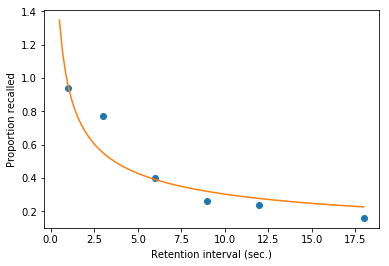

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# assign data to arrays
T = np.array([1, 3, 6, 9, 12, 18])
Y = np.array([0.94, 0.77, 0.40, 0.26, 0.24, 0.16])
X = 100*Y

# plot raw data
plt.plot(T, Y, 'o')
plt.xlabel('Retention interval (sec.)')
plt.ylabel('Proportion recalled')


# negative log likelihood
def nllP(pars):
  a, b = pars
  tmp1 = X*np.log(a*T**b) 
  tmp2 = (100-X)*np.log(1-a*T**b)
  return(-1*np.sum(tmp1+tmp2))

# minimize the NLL
a_init = np.random.uniform()
b_init = -np.random.uniform()
inits = np.array([a_init, b_init])

mleP = minimize(nllP, 
               inits,
               method="nelder-mead")

# 
def power(t,pars):
  a, b = pars
  return(a*t**b)

fitParsP = mleP.x

print(f"a={fitParsP[0]:.3f}, b={fitParsP[1]:.3f}")

x = np.linspace(0.5,18,100)
plt.plot(x, power(x,fitParsP))

plt.show()

# Exponential model

Last time we proposed two candidate models:

*   Power function model: $y=ax^b$
*   Exponential model: $y=ab^x$

Let's now fit an exponential model.




## Step 1 - compute likelihood function

Let's assume each of these 100 trials is independent of the others, and consider each trial a *success* if item is correctly recalled.

Then the probability of correctly recalling $x$ items is:

$$
f(x\mid\theta) = \binom{100}{x}\theta^x(1-\theta)^{100-x}
$$

The critical parameter here is $\theta$ -- the probability of success on any *one* trial.  How do we determine $\theta$?

Let's assume that probability of recall is governed by a **exponential function**.  That is, assume

$$
\theta(t) = ab^t
$$

for constants $a,b$.

Then we can write
$$
f(x,t\mid a,b) = \binom{100}{x}(ab^t)^x(1-ab^t)^{100-x}
$$

which we cast as a likelihood

$$
L(a,b\mid x,t) = \binom{100}{x}(ab^t)^x(1-ab^t)^{100-x}
$$


### Step 2 -- compute log likelihood

This gives us:

$$
\ln L = \ln \Biggl[ \binom{100}{x}\Biggr] + x\ln(ab^t) + (100-x)\ln(1-ab^t)
$$

### Step 3 -- extend to multiple observations

Note that the formula above is for a *single* observation $(x,t)$.  But we have 6 observations!

If we assume each is independent from the others, then we can multiply the likelihoods:

$$
L = \prod_{i=1}^6 L(a,b\mid x_i, t_i)
$$

Thus we have

$$
\ln L = \ln\Biggl(\prod_{i=1}^6 L(a,b\mid x_i,t_i)\Biggr )
$$

But since logs turn products into sums, we can write

$$ \ln L = \sum_{i=1}^6 \ln L(a,b\mid x_i,t_i) = \sum_{i=1}^6 \Biggl(\ln \binom{100}{x_i} + x_i\ln(ab^{t_i}) + (100-x_i)\ln(1-ab^{t_i})\Biggr)$$

As before, we'll ignore the binomial term in our code


In [0]:
def nllE(pars):
  a, b = pars
  tmp1 = X*np.log(a*b**T) 
  tmp2 = (100-X)*np.log(1-a*b**T)
  return(-1*np.sum(tmp1+tmp2))

In [0]:
# check some examples

a = 0.6
b = 0.1
pars = np.array([a,b])

nllE(pars)

3307.9382932584135

In [0]:
a_init = np.random.uniform()
b_init = np.random.uniform()
inits = np.array([a_init, b_init])

mleE= minimize(nllE, 
               inits,
               method="nelder-mead")
print(mleE)

 final_simplex: (array([[1.07009661, 0.87736461],
       [1.0700406 , 0.87738291],
       [1.07017111, 0.87737349]]), array([305.30556818, 305.30556975, 305.30557091]))
           fun: 305.3055681817654
       message: 'Optimization terminated successfully.'
          nfev: 85
           nit: 43
        status: 0
       success: True
             x: array([1.07009661, 0.87736461])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


a=1.070, b=0.877


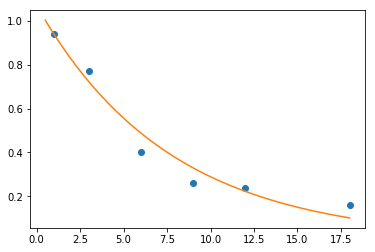

In [0]:
def expon(t,pars):
  a, b = pars
  return(a*b**t)

fitParsE = mleE.x
print(f"a={fitPars[0]:.3f}, b={fitPars[1]:.3f}")

x = np.linspace(0.5,18,100)
plt.plot(T,Y,'o')
plt.plot(x, expon(x,fitParsE))

plt.show()
      

## Look at both fits together

Which is better?


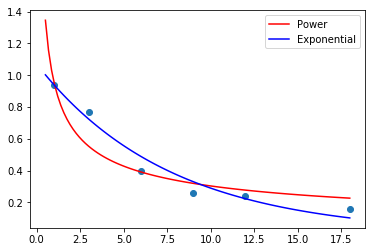

In [0]:
plt.plot(T,Y,'o')
plt.plot(x, power(x,fitParsP), color='red', label='Power')
plt.plot(x, expon(x,fitParsE), color='blue', label='Exponential')
plt.legend()

plt.show()

## Exercises

1. Just like last time, we often see cognitive models written in different forms.  For example, Kahana and Adler (2002) present the exponential model for forgetting as $f(t)=ae^{-bt}$.  Using the same Murdock data, find maximum likelihood estimates for $a$ and $b$.  How does this result compare to the estimates we derived in class?

2. Construct an exponential model for the Rubin and Baddeley data from Lecture 2 (exercise 3).  Compare the fit to the power function model obtained previously.  Which do you think is a better fit?  Why?